# COGS 108 - Marijuana: A Gateway Drug?

## Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

- [ ] YES - make available
- [X] NO - keep private

## Overview
In our project, we researched whether the usage of marijuana correlates with the future usage of “hard drugs” (cocaine, heroin, methamphetamines). Our dataset comes from the US National Survey on Drug Use and Health (2018), that contains data from approximately 55,000 individuals regarding specific drugs they have used (none, marijuana, cocaine, heroin, or meth) and what age they first used them. We separated the individuals in our data set based on whether they have ever used marijuana or not, then checked whether individuals in each group have ever used each of the hard drugs, and calculated the age differences between when an individual first used a hard drug and when they first used marijuana. We found that the usage of marijuana correlated with the usage of hard drugs at a statistically significant level and that the usage of marijuana occurred prior to the usage of hard drugs at a statistically significant level.

## Names
- Molly Huang
- Ethan Chan
- Emerson Chao
- Leilani Camacho

## Research Question
We are focusing on whether or not an individual has used marijuana, whether or not that individual has also used any of our chosen hard drugs (cocaine, heroin, methamphetamines), and at what age they first used (or didn’t use) any of the mentioned substances. This leads us to our research question of: Is an individual’s usage/consumption of marijuana correlated with future usage of “hard drugs,” such as methamphetamine, cocaine, and heroin? More specifically, are marijuana gateways drugs? 


## Background & Prior Work

The issue of drug usage and substance abuse is and has been a contentious topic, receiving more attention than ever in recent years. There has been a lot of research into better substance abuse prevention, and many have pointed to the usage of depressants such as marijuana and nicotine as  being a starting point for exploration into hard drugs, thereby giving them the nickname ‘gateway drugs.’ 

Given the advances in neuroimaging since the 1990’s we have been able to understand the underlying mechanisms of addiction and the reward pathway in the brain. While marijuana is considered a depressant, and hard drugs such as heroin, cocaine, and methamphetamine are all opioids, the neural circuits behind these drugs are connected. There has been growing evidence in the dopamine hijacking hypothesis, which states that with substance abuse, dopamine affects executive function and logic in the frontal lobe, inhibition, impulse control and emotional regulation in the amygdala (Williams). Marijuana contains cannabinoids which act like endocannabinoids, a natural occurring neurotransmitter in the brain used to stop the signaling of other neurotransmitters such as GABA and help with pain modulation, stress reduction, and most importantly mood regulation by stopping the reputake of dopamine in the synaptic cleft thus contributing to the reward pathway. This is important to know because stimulants act in a similar manner by blocking transporter reuptake of monoamines (dopamine, serotonin and neuroepinephrine) which is how people have a euphoric feeling when using opioids. 
 
There has been growing evidence in rodent research that details how developmental exposure to cannabinoids increases heroin induced conditioned place preference (Williams). Marjiuana usage during the developmental age can also lead to changes in gene expression thus altering the priming impact of cannabis on opioids. This is evidence that the cannabinoid system can increase  one's vulnerability to opioid addiction later in life and is consistent with the idea of marijuana as a gateway drug(NIH). 
 
When examined from a social perspective, it is important to understand the different pathways of how marijuana comes to be a gateway drug. Contextual factors to take into consideration include, neighborhoods, community environments, parental supervision, biological makeup, and individuality. Socially there is evidence that someone who uses marijuana recreationally on a regular basis comes into contact with opioids more often than someone who does not use marijuana. This exposure alone means there is an increased opportunity to obtain and use hard drugs (Jaffe). 

References (include links):
- 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7359408/
- 2) https://www.drugabuse.gov/publications/research-reports/marijuana/marijuana-gateway-drug
- 3) https://www.psychologytoday.com/us/blog/all-about-addiction/201807/is-marijuana-gateway-drug

## Hypothesis
We believe that marijuana is  a "gateway drug" and that usage of marijuana does occur statistically significantly earlier than the usage of "hard drugs" such as cocaine, heroin, and methamphetamines. We think this because based on previous research, marijuana usage has been found to lead to individual to be more vulnerable to opioid addiction in the future. Based on this connection, we think that marijuana as a "gateway drug" is plausible. 

## Dataset(s)

Dataset Name: National Survey on Drug Use and Health 2018
Link of Dataset: https://www.datafiles.samhsa.gov/study-dataset/national-survey-drug-use-and-health-2018-nsduh-2018-ds0001-nid18758?fbclid=IwAR33LotgZV-ePF9BaKIY76BnrT1XgXr3U59NSXUTRjif70KVxyZmUDtrAGs

Number of Observations: 55622

This dataset is taken from the National Survey on Drug Use and Health (NSUDH), which is a survey conducted by The Substance Abuse and Mental Health Data Archive (SAMHDA) in conjunction with the US Department of Health and Human Services. This dataset aims to characterize the usage of various drugs in the United States. 


## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
tsv_file = "NSDUH_2018_Tab.tsv"

#select columns that we need for our research
cols = ["MJEVER", "MJAGE", "COCEVER", "COCAGE", "HEREVER", "HERAGE",
        "METHAMEVR", "METHAMAGE"]
# MJEVER = Y/N TRIED MARIJUANA
# MJAGE = AGE FIRST MARIJUANA
# COCEVER = COCAINE EVER
# COCAGE = COCAINE AGE
# HEREVER = HEROIN EVER
# HERAGE = HEROIN AGE
# METHAMEVR = METH EVER
# METHAMAGE = METH AGE

# read in tsv file as a table
df = pd.read_table(tsv_file, usecols = cols ,sep ='\t')

## Data Cleaning

In [3]:
# initial uncleaned table
df

,MJEVER,MJAGE,COCEVER,COCAGE,HEREVER,HERAGE,METHAMEVR,METHAMAGE
0,2,991,2,991,2,991,2,991
1,2,991,2,991,2,991,2,991
2,1,13,2,991,2,991,2,991
3,2,991,2,991,2,991,2,991
4,2,991,2,991,2,991,2,991
...,...,...,...,...,...,...,...,...
56308,2,991,2,991,2,991,2,991
56309,1,15,1,17,2,991,2,991
56310,2,991,2,991,2,991,2,991
56311,1,15,2,991,2,991,2,991


In [4]:
#helper functions for filtering out missing/bad data from rows
def remove_val(table, col, val):
    return table[table[col].isin(val) == False]
def keep_val(table, col, val):
    return table[table[col].isin(val) == True]

In [5]:
ever_cols = ["MJEVER","COCEVER", "HEREVER", "METHAMEVR"]
age_cols = ["MJAGE", "COCAGE", "HERAGE", "METHAMAGE"]

# only keep 1 and 2 for ever tried cols (1 and 2 represent yes and no)
for column in ever_cols:
    df = keep_val(df, column, [1,2])

# remove the bad data from age tried (various forms of "did not answer")
for column in age_cols:
    df = remove_val(df, column, [985, 994, 997, 998])

In [6]:
# removed rows with irrelevant data
df

,MJEVER,MJAGE,COCEVER,COCAGE,HEREVER,HERAGE,METHAMEVR,METHAMAGE
0,2,991,2,991,2,991,2,991
1,2,991,2,991,2,991,2,991
2,1,13,2,991,2,991,2,991
3,2,991,2,991,2,991,2,991
4,2,991,2,991,2,991,2,991
...,...,...,...,...,...,...,...,...
56308,2,991,2,991,2,991,2,991
56309,1,15,1,17,2,991,2,991
56310,2,991,2,991,2,991,2,991
56311,1,15,2,991,2,991,2,991


In [7]:
#swap number values to strings be more clear (except for age numbers)
df[ever_cols] = df[ever_cols].replace([1 ,2], ["Yes", "No"])
df[age_cols] = df[age_cols].replace([991], ["Never"])

In [8]:
# cleaned table
df

,MJEVER,MJAGE,COCEVER,COCAGE,HEREVER,HERAGE,METHAMEVR,METHAMAGE
0,No,Never,No,Never,No,Never,No,Never
1,No,Never,No,Never,No,Never,No,Never
2,Yes,13,No,Never,No,Never,No,Never
3,No,Never,No,Never,No,Never,No,Never
4,No,Never,No,Never,No,Never,No,Never
...,...,...,...,...,...,...,...,...
56308,No,Never,No,Never,No,Never,No,Never
56309,Yes,15,Yes,17,No,Never,No,Never
56310,No,Never,No,Never,No,Never,No,Never
56311,Yes,15,No,Never,No,Never,No,Never


## Data Analysis & Results
&nbsp;


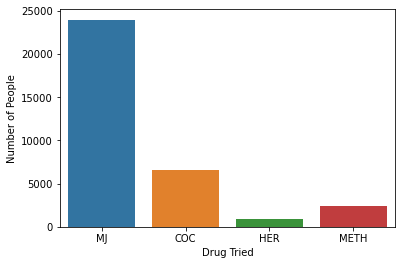

In [9]:
# bar graph of the number of people in this study that have tried each drug 

ever_cols = ["MJEVER", "COCEVER", "HEREVER", "METHAMEVR"]
def num_tried_drug(drug):
    return len(df[df[drug] == "Yes"])

number_ppl = []
for i in ever_cols:
    number_ppl.append(num_tried_drug(i))
    
num_drug = pd.DataFrame(["MJ", "COC", "HER", "METH"])
num_drug.columns = ["Drug Tried"]
num_drug["Number of People"] = number_ppl
num_drug
sns.barplot(x = "Drug Tried", y = "Number of People", data = num_drug)

Median Age of First Try : 16.0


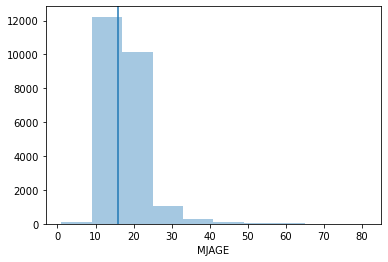

In [10]:
# first age tried distributions of each drug

def age_distr(table, drug):
    temp_table = table[table[drug] != "Never"]
    sns.distplot(temp_table[drug], kde = False, bins = 10)
    mean_age = temp_table[drug].median()
    print("Median Age of First Try :", mean_age)
    plt.axvline(mean_age, 0, 1)
    
age_distr(df, "MJAGE")

Median Age of First Try : 20.0


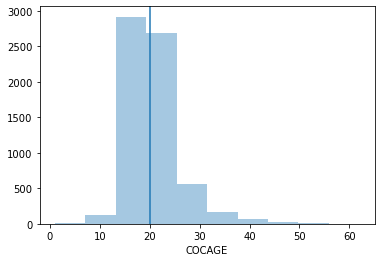

In [11]:
age_distr(df, "COCAGE")

Median Age of First Try : 21.0


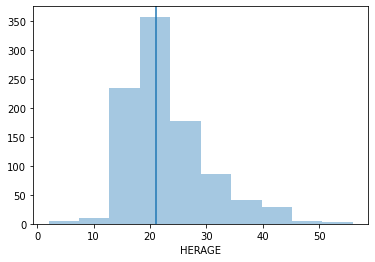

In [12]:
age_distr(df, "HERAGE")

Median Age of First Try : 20.0


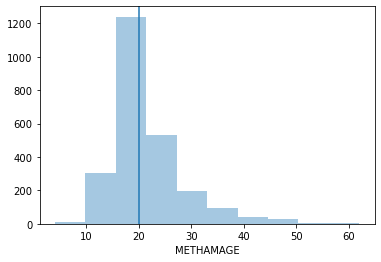

In [13]:
age_distr(df, "METHAMAGE")

The median age of when users tried marijuana (16.0) is lower than the median age of when users first tried cocaine (20.0), heroin (21.0), and methamphetamine (20.0). This demonstrates that it is plausible that marijuana is a "gateway drug" because users do tend to try it at a lower age. However, it's important to note that this by itself most definitely does not demonstrate correlation. 

,MJEVER,DRUGEVER,prop
0,No,0,0.993577
1,No,1,0.005420
2,No,2,0.000940
3,No,3,0.000063
4,Yes,0,0.711940
5,Yes,1,0.192832
6,Yes,2,0.073140
7,Yes,3,0.022088


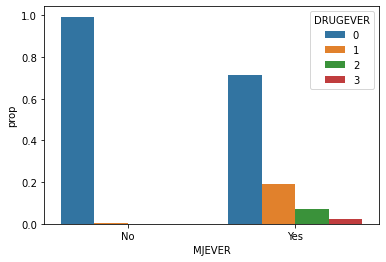

In [14]:
# showing number of drugs tried, among people who have and haven't tried marijuana

hard_drugs = ['COCEVER', 'HEREVER', 'METHAMEVR']
df_temp = df.copy()
df_temp[hard_drugs] = df_temp[hard_drugs].replace(["Yes", "No"], [1,0])
df_temp = df_temp.assign(DRUGEVER = df_temp['COCEVER'] + df_temp['HEREVER'] + df_temp['METHAMEVR'])
df_props = df_temp.groupby(['MJEVER'])['DRUGEVER'].value_counts(normalize = True).rename('prop').reset_index()
display(df_props)
sns.barplot(x = 'MJEVER', y = 'prop', hue = 'DRUGEVER', data = df_props)


The bar plot above shows the proportion of individuals who use any number of the hard drugs listed above (cocaine, heroin, and methamphetamine), separated by whether the individual has ever used marijuana or not. We see that a high proportion of people who have never used marijuana have also never used any hard drugs, whereas a larger proportion of individuals who have used marijuana have also used a number of our specific hard drugs. Notably, about 28.8% of people who have used marijuana have also used at least one of the hard drugs. 

In [15]:
# function for creating a proportion bar plot
def prop_hist(table, column, hue, colors):
    prop_table = table.groupby(column)[hue].value_counts(normalize = True).rename("prop").reset_index()
    prop_table[hue] = prop_table[hue].replace([0,1],['No', 'Yes'])
    prop_table.pivot(column, hue, "prop").plot(kind = "bar", color = colors)
    display(prop_table)


,MJEVER,COCEVER,prop
0,No,No,0.995802
1,No,Yes,0.004198
2,Yes,No,0.732111
3,Yes,Yes,0.267889


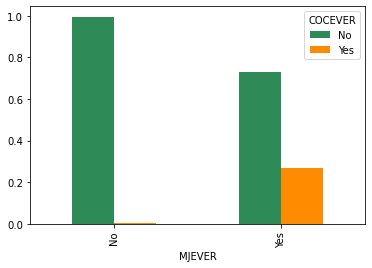

In [16]:
prop_hist(df, "MJEVER", "COCEVER", ["seagreen", "darkorange"])

,MJEVER,HEREVER,prop
0,No,No,0.999311
1,No,Yes,0.000689
2,Yes,No,0.961409
3,Yes,Yes,0.038591


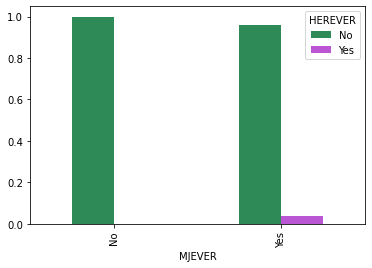

In [17]:
prop_hist(df, "MJEVER", "HEREVER", ["seagreen", "mediumorchid"])

,MJEVER,METHAMEVR,prop
0,No,No,0.997400
1,No,Yes,0.002600
2,Yes,No,0.901104
3,Yes,Yes,0.098896


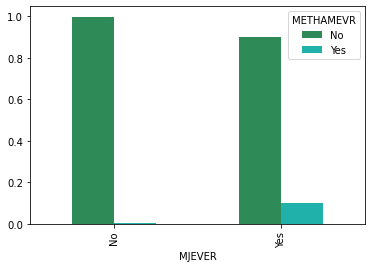

In [18]:
prop_hist(df, "MJEVER", "METHAMEVR", ["seagreen", "lightseagreen"])

In each of the three histograms above, the proportion of people who have used a hard drug are higher in people who have used marijuana compared to people who have never used marijuana. Additionally, out of the indiviudals who have used marijuana, the largest proportion (26.8%) of individuals who have used a hard drug are those who have used cocaine.

Although visually, it appears that there is a signficant difference in hard drug triers when looking at groups that have and haven't also tried marijuana, we ran a chi-squared test for independence to be certain. 

In [19]:
def chi_square(table, drug1, drug2):
    # observed values
    drug1_y = len(table[table[drug1] == "Yes"])
    drug1_n = len(table[table[drug1] == "No"])
    drug2_y = len(table[table[drug2] == "Yes"])
    drug2_n = len(table[table[drug2] == "No"])
    
    #row and column totals
    total_drug1 = len(table)
    total_drug2 = len(table)
    total_drug = total_drug1 + total_drug2
    total_yes = drug1_y + drug2_y
    total_no = drug1_n + drug2_n
    
    #expected values
    e_drug1_y = (total_drug1 * total_yes)/total_drug
    e_drug1_n = (total_drug1 * total_no)/total_drug
    e_drug2_y = (total_drug2 * total_yes)/total_drug
    e_drug2_n = (total_drug2 * total_no)/total_drug
    
    #calc chisquare value (sum of (observed - expected)^2 / expected)
    val = stats.chisquare([drug1_y, drug1_n, drug2_y, drug2_n], f_exp = [e_drug1_y, e_drug1_n, e_drug2_y, e_drug2_n])
    
    return val

print("Marijuana and Cocaine: ", chi_square(df, "MJEVER", "COCEVER"))
print("Marijuana and Heroin: ", chi_square(df, "MJEVER", "HEREVER"))
print("Marijuana and Methamphetamine: ", chi_square(df, "MJEVER", "METHAMEVR"))

Marijuana and Cocaine:  Power_divergenceResult(statistic=13685.30060432488, pvalue=0.0)
Marijuana and Heroin:  Power_divergenceResult(statistic=27408.81938676261, pvalue=0.0)
Marijuana and Methamphetamine:  Power_divergenceResult(statistic=22973.303886260444, pvalue=0.0)


Chi-square test for independence: 

Null Hypothesis: Marijuana use and each hard drug use are independent

Alternative Hypothesis: Marijuana use and each hard drug use are not independent

Significance Level: 0.05

df = (2-1) * (2-1) = 1

In all three cases of the chi-squared test for independence, the p-value was less than 0.05, meaning that we can reject the null hypothesis that the use of marijuana and cocaine, marijuana and heroin, and marijuana and methamphetamine are independent. Now that it is established that there is some sort of relationship between marijuana and the other drugs, the next step is to look into whether marijuana usage occurs prior to hard drug usage.

The previous plots only showed whether an individual who has tried marijuana also tried the specified hard drugs. However, there was no specification on the timeline of the use, which is necessary to show as marijuana being a "gateway drugs" entails usage prior to the usage of "hard drugs." Below, we focus on individuals who have used marijuana and plotted the difference between the age at which they first used marijuana and that of which they first used a specific hard drug.

In [20]:
# function for creating a histogram of age differences between age of each drug's first use
def age_diff(table, drug1, drug2, colors, color2):
    temp_table = table[table[drug1] != "Never"]
    temp_table = temp_table[temp_table[drug2] != "Never"]
    temp_table["age diff"] = temp_table[drug2] - temp_table[drug1]
    sns.distplot(temp_table["age diff"], kde = True, color = colors)
    mean_age_diff = temp_table["age diff"].mean()
    print("mean age difference:", mean_age_diff)
    plt.axvline(mean_age_diff, 0, 1, color = color2)

mean age difference: 5.000466708151836


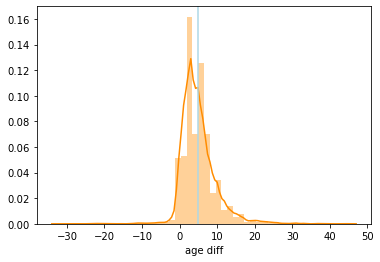

In [21]:
age_diff(df, "MJAGE", "COCAGE", "darkorange", "lightblue")


mean age difference: 8.523758099352051


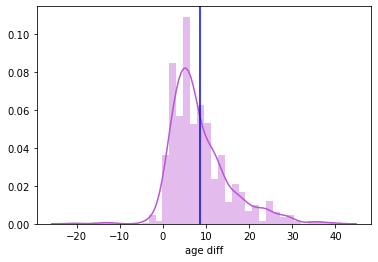

In [22]:
age_diff(df, "MJAGE", "HERAGE", "mediumorchid", "blue")

mean age difference: 6.367467340918668


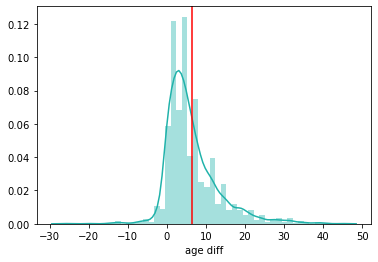

In [23]:
age_diff(df, "MJAGE", "METHAMAGE", "lightseagreen", "red")

Looking at individual cases, marijuana usage typically occurs 5.00 years prior to cocaine usage, which is the smallest age difference. Additionally, marijuana usage typically occurs 8.52 years prior to heroin usage and 6.38 years prior to methamphetamine usage. This demonstrates that on average, marijuana usage occurs prior to the usage of a hard drug. This once again makes it plausible for marijuana to be a "gateway drug," though to what extent needs to be further quantified and examined. Interstingly, the data showed earlier that cocaine is the most common hard drug among indiviudals who have used marijuana and a specific hard drug and given that it has the smallest age difference, there may be some deeper correlation between marijuana and cocaine use. 

If there was no correlation between the age of first trying marijuana and the three hard drugs, we would expect the age difference to be close to zero. We ran a p-value test using the mean and standard deviation to see if the variation from 0 was large enough to be considered statistically significant. Again, we used a significance level of 0.05.

In [24]:
def ptest(table, drug1, drug2):
    temp_table = table[table[drug1] != "Never"]
    temp_table = temp_table[temp_table[drug2] != "Never"]
    temp_table["age diff"] = temp_table[drug2] - temp_table[drug1]
    mean_age_diff = temp_table["age diff"].mean()
    stdv_age_diff = temp_table["age diff"].std()
    n = len(temp_table)
    degrees = 2*n - 2
    test_stat = mean_age_diff / (stdv_age_diff / (n**(1/2)))

    p_val = 1 - stats.t.cdf(test_stat,df=degrees)
    return mean_age_diff, stdv_age_diff, p_val

print("Marijuana and Cocaine: Mean, Standard Deviation, p-val: ", ptest(df, "MJAGE", "COCAGE"))
print("Marijuana and Heroin: Mean, Standard Deviation, p-val: ", ptest(df, "MJAGE", "HERAGE"))
print("Marijuana and Methamphetamine: Mean, Standard Deviation, p-val: ", ptest(df, "MJAGE", "METHAMAGE"))

Marijuana and Cocaine: Mean, Standard Deviation, p-val:  (5.000466708151836, 4.639367177164908, 0.0)
Marijuana and Heroin: Mean, Standard Deviation, p-val:  (8.523758099352051, 6.9328031319824905, 0.0)
Marijuana and Methamphetamine: Mean, Standard Deviation, p-val:  (6.367467340918668, 6.768129375534964, 0.0)


A p-value test for significance was performed:

Null Hypothesis: Mean Difference = 0 

Alternative Hypothesis: Mean Difference > 0


Significance Level: 0.05

In all three cases of the p-value tests, the p-value was less than 0.05, each being 0.0. This means that we can reject the null hypothesis that the mean age difference between usage of marijuana and cocaine, marijuana and heroin, and marijuana and methamphetamine is statistically significant. This means that we can safely say that the usage of marijuana occurs at a much younger age than the usage of cocaine, heroin, or methamphetamines.  

## Ethics & Privacy
#### Data Collection
According to the NSDUH, the 8 states with the largest populations were designated as large sample states (California, Florida, Illinois, Michigan, New York, Ohio, Pennsylvania, and Texas), meaning those states had higher target sample sizes than compared to the rest of the states. 
Additionally, the age groups in our data set were not all sampled at equal rates. 25 percent of the data are of youths 12 to 17 years old, 25 percent 18 to 25, 15 percent 26 to 34, 20 percent 35 to 39, and 15 percent for individuals 50 or older. Furthermore, there was a 30 dollar incentive to participate in the survey, which the NSDUH claims may have contributed to the quality and quantity of responses to their surveys. These sorts of sample biases may lead to unwarranted associations of certain populations and drug usage (e.g. if our results show that marijuana is a gateway drug and our data was drawn largely from California, people may associate Californians with more common drug usage and legal actions may be taken in specific states). 

#### Data Storage
We got our data from a public, online government database, and it does not contain any personally identifiable information, which, in the context of a sensitive topic like drug usage, is very important. This ensures that people involved in the study have full privacy and that none of the information that they disclose can be traced directly to them.

#### Analysis
Our analysis of the data poses a serious ethical consideration as well, especially because of the limitations of our data (discussed in the limitations section) and the multifactorial nature of determining whether something is a “gateway” drug. Because our data is limited in the type of observations it makes, we must be careful not to misinterpret or draw assumptions about our results. Our data does not include demographic information such as health conditions, income, what type of county they live in, or more details on drug usage (e.g. how long an individual has been using marijuana or how often they use a certain hard drug is not included). We also do not want our own assumptions to influence our analysis. If our analysis were to incorrectly assume marijuana is a gateway drug, unwarranted consequences may occur such as the banning of marijuana or more serious sentencing for marijuana related offenses.

#### Deployment 
Even if our analysis is correct, the results of our study may be misinterpreted by others who may spread misinformation and enforce negative stereotypes, or possibly even enact discriminatory and detrimental actions. As mentioned above, laws may be enacted and enforced that may be harmful towards individuals related to marijuan usage, offenses, or businesses. People who rely on selling marijuana may possibly face fines or even be forced to shut down their business, offenders in marijuana related cases may face harsher sentences, and individuals who use marijuana medicinally may have a harder time accessing their necessary medications. To prevent this, we must ensure the clear and transparent communication of our results; correlation can be shown between our chosen variables, but causation can not be drawn, especially on such a complex issue as drug usage. We will also communicate that our intentions are not to discriminate or harm any specific groups of individuals and encourage further research to be conducted on this important issue. 

## Conclusion & Discussion

#### Conclusion: 
Our question centered around determining whether or not marijuana is a gateway drug for the use of hard drugs, specifically cocaine, heroine, and methamphetamines. In order to do this, we performed different statistical analyses to find if marijuana usage correlated with the usage of hard drugs and whether or not marijuana usage occurred prior to the usage of hard drugs. 

To start, we found that the age of first usage of marijuana occurred earlier than the usage of other hard drugs. This demonstrates that it is plausible that marijuana usage is a gateway drug, as to be a gateway drug, usage has to occur first. However, we also found that among users of marijuana, most went on to try no other drugs, indicating that it is not a gateway drug. With conflicting evidence, we decided to delve deeper to try and decipher whether or not there is a correlation between marijuana usage and the usage of hard drugs. 

Next, we performed a chi-squared test for independence and found that the usage of marijuana from the usage of our selected hard drugs are not independent. So, there is a plausibility for marijuana to be a gateway drug as usage of marijuana and cocaine, methamphetamines, and heroine are found to be related at a statistically significant level.

Lastly, we wanted to determine whether or not marijuana usage occurred prior to the usage of hard drugs, as an important facet of being a gateway drug is that its usage occurs first. We found that as a whole, marijuana usage occured years prior to the usage of hard drugs to a statistically significant level. 

In conclusion, we found that marijuana usage occurs prior to "hard drug" usage and is correlated with hard drug usage at a statistically significant level. This indicates that we cannot rule out marijuana is a gateway drug.


#### Limitations:
There definitely are a lot of limitations to our analysis. First off all, with the dataset we have, we cannot prove causation, only correlation because we do not know for sure if marijuana is what leads the individual to use harder drugs. We can only say that the usage is correlated, and marijuana usage occured before the use of "harder drugs." 

Furthermore, we cannot say that our results are generalizable to the entirety of the United States due to the nature of our dataset. According to the NSDUH, the 8 states with the largest populations were designated as large sample states (California, Florida, Illinois, Michigan, New York, Ohio, Pennsylvania, and Texas), meaning those states had higher target sample sizes than compared to the rest of the states. While this was done in order to better represent the state of drug usage in the overall American population, the bias in data from certain states over others may affect our analysis and end results. For example, states like California and Oregon have much laxer drug-related laws and different cultures compared to other states; if a disproportionate amount of data were to be sampled from California, our results may then be skewed by unforeseen confounding variables (such as the drug legality, accessibility, and culture of California). 

There was also a 30 dollar incentive to participate in the survey, which the NSDUH claims may have contributed to the quality and quantity of responses to their surveys. This incentive may have resulted in a financially biased sample. As mentioned earlier in the background and hypothesis sections, the later usage of hard drugs is likely multifactorial, drawing from genetic and social factors and possibly other drug usage (specifically marijuana). Because of the monetary incentive, the survey may be excluding middle to upper class populations who would not need the 30 dollars and therefore would not participate in the survey. This sort of sample bias may lead to unwarranted implications of class and drug usage correlations (e.g. if our results show that marijuana is a gateway drug and our data was drawn from individuals of a specific financial class, people may associate those of that class with more common drug usage). 

Additionally, the age groups in our data set were not all sampled at equal rates. 25 percent of the data are of youths 12 to 17 years old, 25 percent 18 to 25, 15 percent 26 to 34, 20 percent 35 to 39, and 15 percent for individuals 50 or older. The large percentage of young demographics may skew the results of our analysis. Since we are observing whether or not an individual has used marijuana and the proportion of those individuals who have gone on to use any of the hard drugs, there will be an average age at which individuals first used marijuana and an average period of time before they use a hard drug. If the supposed average age of use and time before hard drug usage is greater than the 12 to 17 year age bracket, then a majority of the 12 to 17 year old samples may possibly contribute to the never used categories for both marijuana and hard drug categories. Essentially, it is possible that the 12 to 17 year old group may not be at the age where the individual first tries marijuana (if they ever do) and may not have lived long enough to find out whether they will have used any of the hard drugs listed, skewing our data.

## Team Contributions
- Molly Huang: Conception of the project, dataset search, analysis of visualized data, conclusion and discussion.

- Ethan Chan: Conception of the project, dataset cleaning, dataset visualization, conclusion and discussion.

- Emerson Chao: Conception of the project, dataset cleaning, dataset visualization, ethics and privacy, limitations.

- Leilani Camacho: Conception of the project, dataset search, background, ethics and privacy. 